In [1]:
from newscatcher import Newscatcher
import pandas as pd
from datetime import datetime
from google_news import fetch_news

In [2]:
all_headlines_csv = 'data/google-news-headlines.csv'
all_df_headlines = pd.read_csv(all_headlines_csv)

In [3]:
now = datetime.utcnow().strftime('%Y-%m-%d %H:%M')
now

'2020-03-11 06:56'

In [4]:
# get the current headlines
ns = Newscatcher('news.google.com')
df_latest = pd.DataFrame({'datetime': now, 'headline': ns.headlines})


In [22]:
country_tlds = pd.read_csv('https://raw.githubusercontent.com/alext234/ccTLD/master/data/cc_tld.csv')


In [23]:
titles = set()
for _, tld in country_tlds.iterrows():
    gnews_url = 'https://news.google.com'+tld[0]
    try:
        titles.update(fetch_news(gnews_url))
        print(f'fetched {gnews_url}')
    except Exception as e:
        # probably some country TLD do not have a google news domain
        pass


fetched https://news.google.com.af
fetched https://news.google.com.ag
fetched https://news.google.com.ai


In [24]:
assert len(titles)>0

In [25]:
df_latest = pd.DataFrame({'datetime':now, 'headline': list(titles)})

In [26]:
df_latest.head(10)

,datetime,headline
0,2020-03-11 06:56,Trump endorses Sessions' opponent in Alabama S...
1,2020-03-11 06:56,Why Taller Grass Can Be Bad News For Grasshopp...
2,2020-03-11 06:56,Gilead’s coronavirus treatment is already bein...
3,2020-03-11 06:56,"Coronavirus spreads in Pennsylvania, as cancel..."
4,2020-03-11 06:56,Tens of thousands of students out of school as...
5,2020-03-11 06:56,"4 deaths, 30 hospitalizations linked to lister..."
6,2020-03-11 06:56,Robert Durst’s Murder Trial Begins After Decad...
7,2020-03-11 06:56,Italy in coronavirus lockdown as deaths soar a...
8,2020-03-11 06:56,Tulsi Gabbard blasts 'hypocrisy' of DNC and th...
9,2020-03-11 06:56,Taliban prisoner swap begins as part of Afghan...


In [27]:
# merge with the old one
all_df_headlines = all_df_headlines.append(df_latest, sort=True)


In [28]:
all_df_headlines.drop_duplicates(['headline'], inplace=True)

In [29]:
# save all headlines  to file
all_df_headlines.to_csv(all_headlines_csv, index=False)

In [30]:
def is_reference_corona(s):
    return (
        ('coronavirus' in s)
        or ('covid-19' in s)
        or ('corona' in s)
        or ('ncov' in s)
    )
        
    
# is_virus is 1 if there is reference to coronavirus
    
all_df_headlines['is_virus']= (
    all_df_headlines['headline']
    .apply(lambda v: 1 
           if is_reference_corona(v.lower()) else 0)
)

In [31]:
# cumu sum of number of references to virus
all_df_headlines['total_virus'] = all_df_headlines['is_virus'].cumsum()

In [32]:
df_latest_samples = all_df_headlines[all_df_headlines['is_virus']==1].tail(5)
df_latest_samples[['headline']]

,headline
14,Face mask shortage prompts CDC to loosen coron...
23,New York sends in national guard as US coronav...
26,Gov. Gretchen Whitmer declares state of emerge...
31,Massachusetts declares emergency as coronaviru...
35,China wants to take a victory lap over its han...


In [37]:
# output json stat 
import json
data_stats_json = 'data/data_stats.json'
data_stats = {'datetime:': now, "num_headlines_fetched": all_df_headlines.shape[0]}
with open('data_stats_json', 'w') as fo:
    fo.write(json.dumps(data_stats))

'{"datetime:": "2020-03-11 06:56", "num_headlines_fetched": 80904}'

In [16]:
# plot chart number of headline mentioning coronavirus
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

png_file = 'images/google-news-headlines.png'
# convert to pd.datetime
all_df_headlines['datetime_idx'] = pd.to_datetime(all_df_headlines['datetime'], format="%Y-%m-%d %H:%M")
all_df_headlines.set_index('datetime_idx', inplace=True)


In [17]:
all_df_headlines

,datetime,headline,is_virus,total_virus
datetime_idx,,,,
2020-02-27 19:51:00,2020-02-27 19:51,The 31 wildest lines from Donald Trump's self-...,1,1
2020-02-27 21:14:00,2020-02-27 21:14,Coronavirus: Outbreak at 'decisive point' as W...,1,2
2020-02-27 21:14:00,2020-02-27 21:14,Shooter at Milwaukee Molson Coors had a long-r...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,Democratic Leaders Willing to Risk Party Damag...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,"Catherine Pugh, Former Baltimore Mayor, Senten...",0,2
...,...,...,...,...
2020-03-11 06:05:00,2020-03-11 06:05,Tin mới nhất Mbappe nghi nhiễm Covid-19: Lộ kế...,1,13544
2020-03-11 06:05:00,2020-03-11 06:05,“火线”入党背后的故事 - 人民网,0,13544
2020-03-11 06:05:00,2020-03-11 06:05,Były wiceminister finansów: restart gospodarki...,0,13544


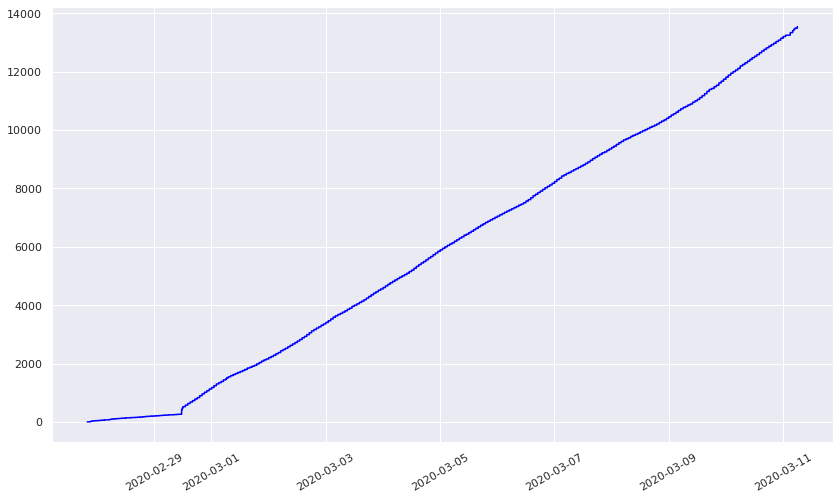

In [18]:
sns.set(rc={'figure.figsize':(14,8)})

fig, axs = plt.subplots(nrows=1)

sns.lineplot(x=all_df_headlines.index, y = 'total_virus', data=all_df_headlines, ax= axs, estimator=None, color='blue')

axs.set_xlabel('')
axs.set_ylabel('')
axs.tick_params(axis='x', labelrotation=30)

In [19]:
fig.savefig(png_file)
